In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
img1 = Image.open('dataset/spiral/training/healthy/V02HE03.png')
img2 = Image.open('dataset/spiral/training/parkinson/V07PE03.png')
img3 = Image.open('dataset/wave/training/healthy/V03HO03.png')
img4 = Image.open('dataset/wave/training/parkinson/V03PO02.png')

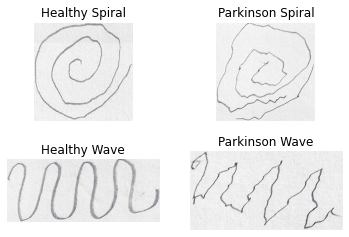

In [3]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
plt.axis('off')
plt.title('Healthy Spiral')
ax1.imshow(img1)

ax2 = fig.add_subplot(2,2,2)
plt.title('Parkinson Spiral')
plt.axis('off')
ax2.imshow(img2)

ax3 = fig.add_subplot(2,2,3)
plt.title('Healthy Wave')
plt.axis('off')
ax3.imshow(img3)

ax4 = fig.add_subplot(2,2,4)
plt.title('Parkinson Wave')
plt.axis('off')
ax4.imshow(img4)

In [15]:
train_dir_spiral = 'dataset/spiral/training'
test_dir_spiral = 'dataset/spiral/testing'
train_dir_wave = 'dataset/wave/training'
test_dir_wave = 'dataset/wave/testing'

In [16]:
Name=[]
for file in os.listdir(train_dir_spiral):
    Name+=[file]
print(Name)
print(len(Name))

['healthy', 'parkinson']
2


In [17]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [18]:
dataset_sp=[]
count=0
for file in os.listdir(train_dir_spiral):
    path=os.path.join(train_dir_spiral,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_sp.append([image,count])
    count=count+1
    
testset_sp=[]
count=0
for file in os.listdir(test_dir_spiral):
    path=os.path.join(test_dir_spiral,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_sp.append([image,count])
    count=count+1

In [19]:
dataset_wv=[]
count=0
for file in os.listdir(train_dir_wave):
    path=os.path.join(train_dir_wave,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        dataset_wv.append([image,count])
    count=count+1
    
testset_wv=[]
count=0
for file in os.listdir(test_dir_wave):
    path=os.path.join(test_dir_wave,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
        image=img_to_array(image)
        image=image/255.0
        testset_wv.append([image,count])
    count=count+1

In [20]:
data_sp,labels_sp0=zip(*dataset_sp)
test_sp,tlabels_sp0=zip(*testset_sp)

data_wv,labels_wv0=zip(*dataset_wv)
test_wv,tlabels_wv0=zip(*testset_wv)

In [21]:
labels_sp1=to_categorical(labels_sp0)
data_sp=np.array(data_sp)
labels_sp=np.array(labels_sp1)

tlabels_sp1=to_categorical(tlabels_sp0)
test_sp=np.array(test_sp)
tlabels_sp=np.array(tlabels_sp1)

In [22]:
labels_wv1=to_categorical(labels_wv0)
data_wv=np.array(data_wv)
labels_wv=np.array(labels_wv1)

tlabels_wv1=to_categorical(tlabels_wv0)
test_wv=np.array(test_wv)
tlabels_wv=np.array(tlabels_wv1)

In [23]:
trainx_sp,testx_sp,trainy_sp,testy_sp=train_test_split(data_sp,labels_sp,test_size=0.2,random_state=44)
trainx_wv,testx_wv,trainy_wv,testy_wv=train_test_split(data_wv,labels_wv,test_size=0.2,random_state=44)

In [24]:
print(trainx_sp.shape)
print(testx_sp.shape)
print(trainy_sp.shape)
print(testy_sp.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


In [25]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [26]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

pretrained_model4 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model4.trainable = False

In [27]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model3 = tf.keras.Model(inputs=inputs3, outputs=outputs3)

inputs4 = pretrained_model4.input
x4 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model4.output)
outputs4 = tf.keras.layers.Dense(2, activation='softmax')(x4)
model4 = tf.keras.Model(inputs=inputs4, outputs=outputs4)

In [28]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 50, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

conv5_block5_0_relu (Activation (None, 3, 3, 1024)   0           conv5_block5_0_bn[0][0]          
__________________________________________________________________________________________________
conv5_block5_1_conv (Conv2D)    (None, 3, 3, 128)    131072      conv5_block5_0_relu[0][0]        
__________________________________________________________________________________________________
conv5_block5_1_bn (BatchNormali (None, 3, 3, 128)    512         conv5_block5_1_conv[0][0]        
__________________________________________________________________________________________________
conv5_block5_1_relu (Activation (None, 3, 3, 128)    0           conv5_block5_1_bn[0][0]          
__________________________________________________________________________________________________
conv5_block5_2_conv (Conv2D)    (None, 3, 3, 32)     36864       conv5_block5_1_relu[0][0]        
__________________________________________________________________________________________________
conv5_bloc

In [29]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
his3=model3.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(testx_sp,testy_sp),epochs=50)
his4=model4.fit(datagen.flow(trainx_wv,trainy_wv,batch_size=32),validation_data=(testx_wv,testy_wv),epochs=50)

Epoch 1/50
2/2 [==============================] - 23s 6s/step - loss: 1.1867 - accuracy: 0.5254 - val_loss: 0.7776 - val_accuracy: 0.6000
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 0.7171 - accuracy: 0.6319 - val_loss: 1.8211 - val_accuracy: 0.4000
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 1.2913 - accuracy: 0.5618 - val_loss: 0.9947 - val_accuracy: 0.5333
Epoch 4/50
2/2 [==============================] - 3s 2s/step - loss: 0.7534 - accuracy: 0.6202 - val_loss: 0.5303 - val_accuracy: 0.7333
Epoch 5/50
2/2 [==============================] - 3s 2s/step - loss: 0.6014 - accuracy: 0.5514 - val_loss: 0.6697 - val_accuracy: 0.6000
Epoch 6/50
2/2 [==============================] - 3s 2s/step - loss: 0.7793 - accuracy: 0.5618 - val_loss: 0.4704 - val_accuracy: 0.8000
Epoch 7/50
2/2 [==============================] - 3s 2s/step - loss: 0.5740 - accuracy: 0.7399 - val_loss: 0.5381 - val_accuracy: 0.8000
Epoch 8/50
2/2 [========================

In [31]:
#spiral
y_pred_sp=model3.predict(testx_sp)
pred_sp=np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(testy_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.78      0.88         9

    accuracy                           0.87        15
   macro avg       0.88      0.89      0.87        15
weighted avg       0.90      0.87      0.87        15



In [33]:
#wave
y_pred_wv=model4.predict(testx_wv)
pred_wv=np.argmax(y_pred_wv,axis=1)
ground_wv = np.argmax(testy_wv,axis=1)
print(classification_report(ground_wv,pred_wv))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.90      1.00      0.95         9

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



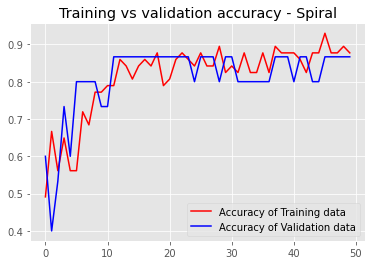

<Figure size 432x288 with 0 Axes>

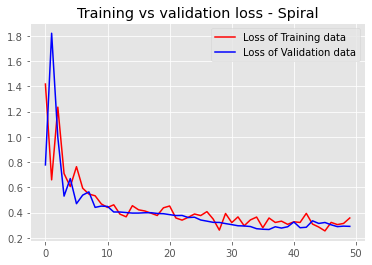

<Figure size 432x288 with 0 Axes>

In [34]:
get_acc3 = his3.history['accuracy']
value_acc3 = his3.history['val_accuracy']
get_loss3 = his3.history['loss']
validation_loss3 = his3.history['val_loss']

epochs3 = range(len(get_acc3))
plt.plot(epochs3, get_acc3, 'r', label='Accuracy of Training data')
plt.plot(epochs3, value_acc3, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs3 = range(len(get_loss3))
plt.plot(epochs3, get_loss3, 'r', label='Loss of Training data')
plt.plot(epochs3, validation_loss3, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.figure()
plt.show()

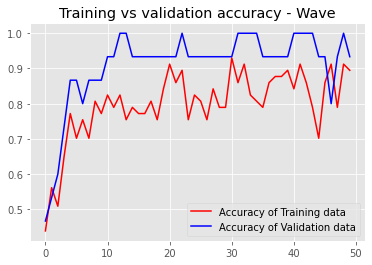

<Figure size 432x288 with 0 Axes>

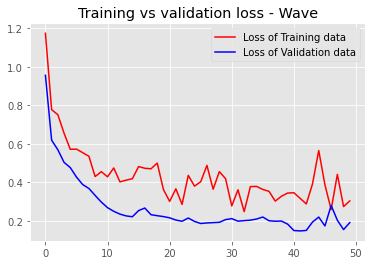

<Figure size 432x288 with 0 Axes>

In [35]:
get_acc4 = his4.history['accuracy']
value_acc4 = his4.history['val_accuracy']
get_loss4 = his4.history['loss']
validation_loss4 = his4.history['val_loss']

epochs4 = range(len(get_acc4))
plt.plot(epochs4, get_acc4, 'r', label='Accuracy of Training data')
plt.plot(epochs4, value_acc4, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs4 = range(len(get_loss4))
plt.plot(epochs4, get_loss4, 'r', label='Loss of Training data')
plt.plot(epochs4, validation_loss4, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.figure()
plt.show()

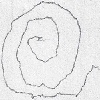

In [36]:
load_img("dataset/spiral/testing/parkinson/V03PE07.png",target_size=(100,100))

In [37]:
image=load_img("dataset/spiral/testing/parkinson/V03PE07.png",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

prediction=model3.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is parkinson.


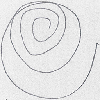

In [40]:
load_img("dataset/spiral/testing/healthy/V04HE01.png",target_size=(100,100))

In [41]:
image=load_img("dataset/spiral/testing/healthy/V04HE01.png",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

prediction=model3.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

Prediction is healthy.
